In [13]:
import pandas   as pd

#Exercise 1: Series
#question 1


date_range=pd.date_range(start='1/1/2010', end='31/12/2020')

integer_series = pd.Series((date_range - date_range[0]).days, index=date_range) # Вычисляем количество дней с 1 января 2010 года Метод .days применяется к полученному 
#TimedeltaIndex и извлекает количество дней из каждой временной дельты. Это преобразует временные интервалы 
# в целые числа, где каждое число представляет количество дней, прошедших с 1 января 2010 года до
#  соответствующей даты.

moving_avg = integer_series.rolling(window=7).mean()

integer_series.head(4018)

2010-01-01       0
2010-01-02       1
2010-01-03       2
2010-01-04       3
2010-01-05       4
              ... 
2020-12-27    4013
2020-12-28    4014
2020-12-29    4015
2020-12-30    4016
2020-12-31    4017
Freq: D, Length: 4018, dtype: int64

In [14]:
#question 2
print(moving_avg)

2010-01-01       NaN
2010-01-02       NaN
2010-01-03       NaN
2010-01-04       NaN
2010-01-05       NaN
               ...  
2020-12-27    4010.0
2020-12-28    4011.0
2020-12-29    4012.0
2020-12-30    4013.0
2020-12-31    4014.0
Freq: D, Length: 4018, dtype: float64


In [26]:
#Exercise 2: Financial data
data = pd.read_csv('AAPL.txt')
#question 1

data.dropna(inplace=True)# drop missing values        print(data.isna().sum()) - for check
data['Date'] = pd.to_datetime(data['Date'])#convert string dates to datetime objects
data.set_index('Date', inplace=True)# set the date column as the index   print(data['Date'].dtype) for check



data.info()
#data.describe()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10118 entries, 1980-12-12 to 2021-01-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10118 non-null  float64
 1   High       10118 non-null  float64
 2   Low        10118 non-null  float64
 3   Close      10118 non-null  float64
 4   Adj Close  10118 non-null  float64
 5   Volume     10118 non-null  float64
dtypes: float64(6)
memory usage: 553.3 KB


In [27]:
import plotly.graph_objects as go

#question 3
transformed_df = data.resample('BME').agg({
    'Open': 'mean',  # Открытие: среднее
    'Close': 'mean',  # Закрытие: среднее
    'Adj Close': 'mean',  # Отрегулированное закрытие: среднее
    'Low': 'min',  # Минимум: минимальное значение
    'High': 'max',  # Максимум: максимальное значение
    'Volume': 'sum'  # Объем: сумма
})

# question 2
fig = go.Figure(data=[go.Candlestick(
                x=transformed_df.index,   # Даты как индекс (datetime)
                open=transformed_df['Open'],  # Цена открытия
                high=transformed_df['High'],  # Максимальная цена
                low=transformed_df['Low'],    # Минимальная цена
                close=transformed_df['Close'] # Цена закрытия
                



)])


fig.update_layout(
    title='Candlestick Chart of Stock',
    xaxis_title='Date',
    yaxis_title='Price'
)

fig.show()  # Показываем график

print(transformed_df.head().to_markdown())
print("Total months",transformed_df.shape[0])

| Date                |     Open |    Close |   Adj Close |      Low |     High |      Volume |
|:--------------------|---------:|---------:|------------:|---------:|---------:|------------:|
| 1980-12-31 00:00:00 | 0.136075 | 0.135903 |   0.107022  | 0.112723 | 0.161272 | 1.34485e+09 |
| 1981-01-30 00:00:00 | 0.141768 | 0.141316 |   0.111285  | 0.126116 | 0.155134 | 6.08989e+08 |
| 1981-02-27 00:00:00 | 0.118215 | 0.117892 |   0.092839  | 0.106027 | 0.128906 | 3.21619e+08 |
| 1981-03-31 00:00:00 | 0.111328 | 0.110871 |   0.0873101 | 0.09654  | 0.120536 | 7.00717e+08 |
| 1981-04-30 00:00:00 | 0.121811 | 0.121545 |   0.0957159 | 0.108259 | 0.131138 | 5.36928e+08 |
Total months 482


In [17]:
# question 4
data['Daily Return'] = data['Open'].pct_change()


# Check the first few rows of the data
print(data[['Daily Return']].head(10))


            Daily Return
Date                    
1980-12-12           NaN
1980-12-15     -0.047823
1980-12-16     -0.073063
1980-12-17      0.019703
1980-12-18      0.028992
1980-12-19      0.061029
1980-12-22      0.048669
1980-12-23      0.042199
1980-12-24      0.052628
1980-12-26      0.092309


In [18]:
import numpy as np
#Exercise 3: Multi asset returns

business_dates=pd.bdate_range("2021-01-01","2021-12-31")

tickets=['AAPL','FB', 'GE', 'AMZN', 'DAI']

index=pd.MultiIndex.from_product([business_dates,tickets],names=["Date","Ticker"])

market_data=pd.DataFrame(index=index, data=np.random.randn(len(index),1),columns=["Price"])

market_data.pivot_table(values="Price", index="Date", columns="Ticker").pct_change()



Ticker,AAPL,AMZN,DAI,FB,GE
Date,,,,,
2021-01-01,NaN,NaN,NaN,NaN,NaN
2021-01-04,12.296947,-0.330285,-3.466382,0.918876,-2.013598
2021-01-05,-1.318911,-1.287581,-3.009509,0.603222,-2.620181
2021-01-06,-1.006465,-5.428629,0.101952,0.922164,-1.878982
2021-01-07,214.875042,0.271090,-0.474715,-1.529505,-1.224059
...,...,...,...,...,...
2021-12-27,0.548344,-2.525023,-0.787619,-1.415887,-0.474947
2021-12-28,-1.096082,-0.813453,-3.315921,-16.036092,0.057709
2021-12-29,3.631710,3.601437,0.246931,1.102915,-0.143746


In [19]:
#Exercise 4: Backtest
import pandas as pd
import numpy as np
#question 1

data = pd.read_csv('AAPL.txt')
#df.info()
#  Check for missing values and drop rows if any exist
if data.isna().sum().any():
    data.dropna(inplace=True)

#  Convert 'Date' to datetime if not already in datetime format
if 'Date' in data.columns:
    if not pd.api.types.is_datetime64_any_dtype(data['Date']):
        data['Date'] = pd.to_datetime(data['Date'])
    #  Set 'Date' as index if it's not already
    if data.index.name != 'Date':
        data.set_index('Date', inplace=True)


data['Future Return'] = (data['Adj Close'].shift(-1) - data['Adj Close']) / data['Adj Close']


print(data['Future Return'])


Date
1980-12-12   -0.052170
1980-12-15   -0.073403
1980-12-16    0.024750
1980-12-17    0.029000
1980-12-18    0.061024
                ...   
2021-01-25    0.001679
2021-01-26   -0.007684
2021-01-27   -0.034985
2021-01-28   -0.037421
2021-01-29         NaN
Name: Future Return, Length: 10118, dtype: float64


In [20]:
#question 2
np.random.seed(2712)
df = pd.DataFrame(index=pd.date_range(start='2010-01-01', periods=len(data), freq='D'))

# Create random long-only signals (0 or 1) for each date in the index
long_only_signal = pd.Series(np.random.randint(0, 2, len(data.index)), index=data.index, name='long_only_signal')


print(long_only_signal)

Date
1980-12-12    1
1980-12-15    0
1980-12-16    1
1980-12-17    1
1980-12-18    1
             ..
2021-01-25    1
2021-01-26    1
2021-01-27    1
2021-01-28    0
2021-01-29    1
Name: long_only_signal, Length: 10118, dtype: int32


In [21]:
#question 3
if data.isna().sum().any():
    data.dropna(inplace=True)

PnL = long_only_signal * data['Future Return']  # PnL is the return when signal is 1, otherwise 0

# Since invested amount is $1, the return is the same as the PnL
strategy_return = PnL

# Print the strategy return
print("\nStrategy Return based on the Signal:")
strategy_return



Strategy Return based on the Signal:


Date
1980-12-12   -0.052170
1980-12-15   -0.000000
1980-12-16    0.024750
1980-12-17    0.029000
1980-12-18    0.061024
                ...   
2021-01-25    0.001679
2021-01-26   -0.007684
2021-01-27   -0.034985
2021-01-28   -0.000000
2021-01-29         NaN
Length: 10118, dtype: float64

In [22]:
#question 4
total_invested = long_only_signal.sum()

# Считаем суммарный PnL (общий доход)
total_earned = PnL.sum()

# Вычисляем доходность стратегии
strategy_return = total_earned / total_invested

print(f"Total invested: {total_invested}$")
print(f"Total earned: {total_earned + total_invested}$")  # Общая сумма после инвестирования
print(f"Strategy Return: {strategy_return:.15f}")


Total invested: 5022$
Total earned: 5026.562457958401$
Strategy Return: 0.000908494217125


In [23]:
#question 5
always_buy_signal = pd.Series(1, index=data.index, name='always_buy_signal')

# Вычисляем PnL при постоянном инвестировании
always_buy_PnL = always_buy_signal * data['Future Return']


always_buy_return = always_buy_PnL.sum() / always_buy_signal.sum()

print("\nTotal Strategy Return (Always Buy):", always_buy_return)  



Total Strategy Return (Always Buy): 0.001126813308607615


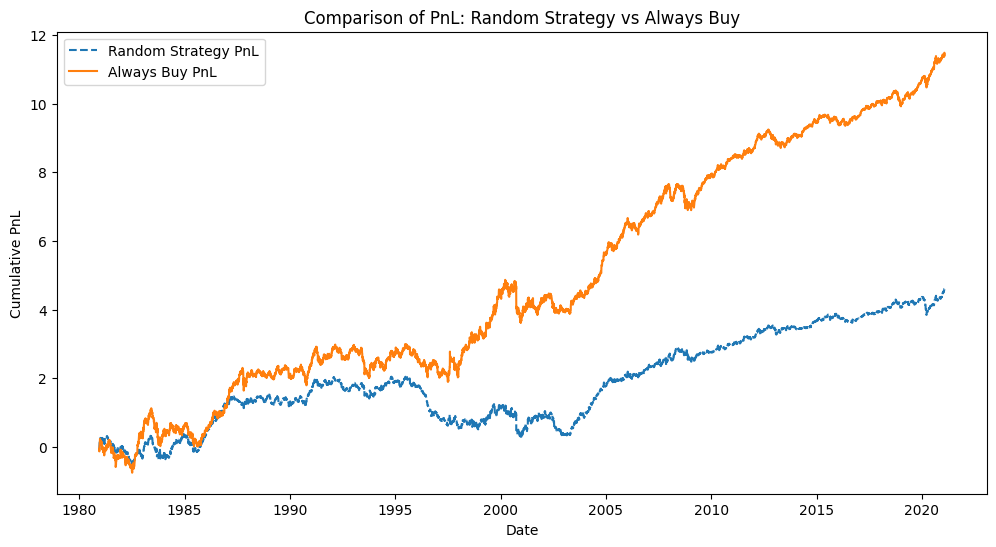

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(PnL.cumsum(), label="Random Strategy PnL", linestyle="--")
plt.plot(always_buy_PnL.cumsum(), label="Always Buy PnL", linestyle="-")
plt.legend()
plt.title("Comparison of PnL: Random Strategy vs Always Buy")
plt.xlabel("Date")
plt.ylabel("Cumulative PnL")
plt.show()
